In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/uncontrollable_sample.csv', index_col='id')

In [3]:
df

,idpop_local_sum,idpop_citywide_sum,idpop_local_food_sum,idpop_citywide_food_sum,idpop_local_nightlife_sum,idpop_citywide_nightlife_sum,idpop_local_travel_sum,idpop_citywide_travel_sum,venue_count_500m,sub_cnt_20m,...,neighbourhood_West Village,neighbourhood_Westchester Village,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside
id,,,,,,,,,,,,,,,,,,,,,
33699563.0,7.992767,0.803436,7.157023,0.805422,13.380945,0.630482,7.921177,0.630585,44,4,...,0,0,0,0,0,0,0,0,0,0
16585605.0,0.000769,0.739474,0.000769,0.608763,0.000769,0.752475,0.000769,0.892192,6,1,...,0,0,0,0,0,0,0,0,0,0
31767505.0,24.897783,2.047967,27.071885,2.982674,11.118003,1.365497,21.060435,2.646382,78,12,...,0,0,0,0,0,0,0,0,0,0
1655390.0,2.110251,0.568449,2.446163,0.568007,1.857215,0.577803,2.622797,0.551869,1,1,...,0,0,0,0,0,0,0,0,0,0
10615883.0,10.972633,0.684232,4.148196,0.725314,6.891011,0.619826,3.914252,0.598249,6,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22262408.0,5.829253,1.369904,6.684054,2.193832,6.926720,1.982051,4.093179,1.347117,36,1,...,0,0,0,0,0,0,0,0,0,0
66451.0,0.003413,0.867147,0.004233,0.964085,0.003113,0.822118,0.004291,0.768899,12,2,...,0,0,0,0,0,0,0,0,0,0
26337253.0,3.743130,0.330455,5.096838,0.314299,4.078022,0.327557,5.122994,0.324630,7,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Label'])
Y = df['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [94]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=50, min_samples_split=100)
dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

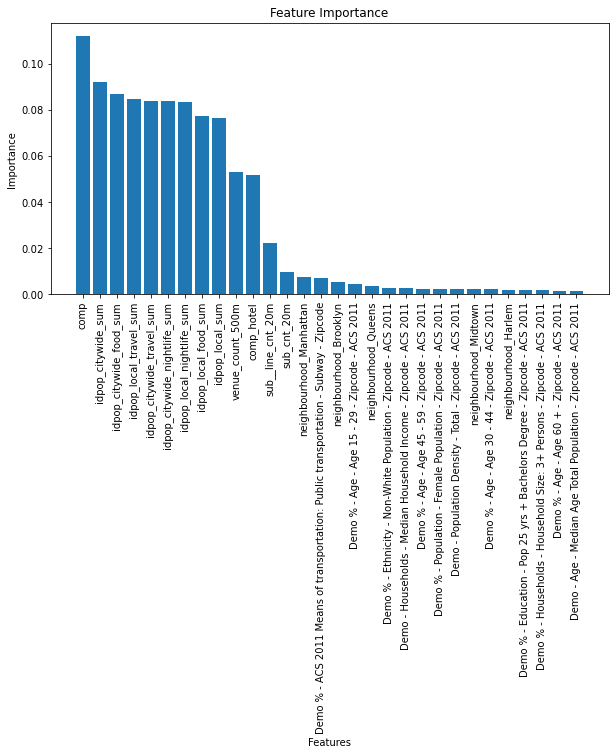

In [95]:
#Get feature importances
feature_mi = dt.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1][0:30]],feature_mi[featureinds[::-1][0:30]])
plt.xticks(X_train.columns.values[featureinds[::-1][0:30]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

In [187]:
from sklearn.metrics import accuracy_score

#Make predictions for both training and test data
predictions_train=dt.predict(X_train)
predictions_test=dt.predict(X_test)

#Compute accuracies
train_accuracy=accuracy_score(Y_train,predictions_train)
test_accuracy=accuracy_score(Y_test,predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.5928117603089572
Test Accuracy is 0.5513203786746388


In [188]:
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = np.arange(1,200,20)

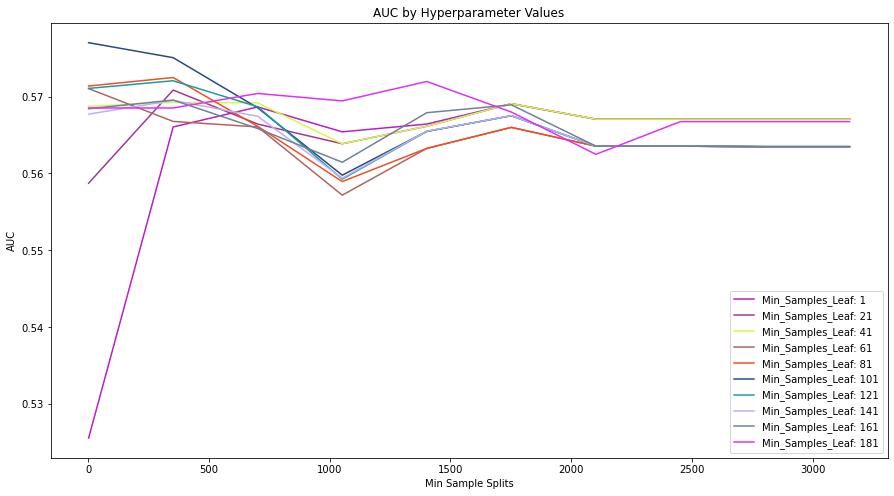

In [189]:
plt.figure(figsize=(15,8))
accuracies = dict()
aucs = dict()
#Go through each min leaf values
for leaf in min_samples_leaf_values:
    accuracies[leaf] = np.zeros(10)
    aucs[leaf] = np.zeros(10)
    #Go through each min split values
    for i, split in enumerate(min_samples_split_values):
        #build and fit a new decision tree with current hyperparameters
        dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=leaf, min_samples_split=split)
        dt.fit(X_train, Y_train)
        
        #Add accuracies to the dictionary
        accuracies[leaf][i] = accuracy_score(Y_test,dt.predict(X_test))
        predictions_dt = dt.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
        aucs[leaf][i] = metrics.auc(fpr,tpr)
        
    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    
    #Plot the accuracies for this leaf value with minimum split values on the x axis
    plt.plot(min_samples_split_values, aucs[leaf], color = c, label = "Min_Samples_Leaf: " + str(leaf))

#Add some finishing touches
plt.legend()
plt.xlabel('Min Sample Splits')
plt.ylabel('AUC')
plt.title('AUC by Hyperparameter Values')
plt.show()

In [190]:

max_accuracy = 0
max_auc = 0
max_leaf = 0
max_split = 0

#Loop through the dictionary to find which combination gives us the highest accuracy
for leaf in accuracies.keys():
    for i, split in enumerate(min_samples_split_values):
        if aucs[leaf][i] > max_auc:
            max_auc = aucs[leaf][i]
            max_leaf = leaf
            max_split = split

#print the highest Accuracy and Relevant Configuration            
print("Max AUC: " + str(max_auc))
print("Best Minimum Leaf Size: " + str(max_leaf))
print("Best Minimum Samples for Split: " + str(max_split))

Max AUC: 0.5770007056372576
Best Minimum Leaf Size: 101
Best Minimum Samples for Split: 2


In [102]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=60, min_samples_split=1400)
#dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

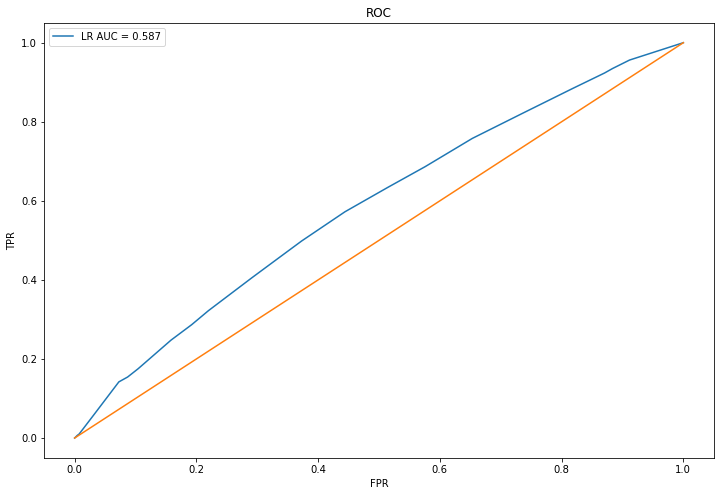

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "LR AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

(4014,)

## Using GridSearch

In [104]:
# importing libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [105]:
# Creating an standardscaler object
std_slc = StandardScaler()

In [143]:
# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

In [144]:
# Creating a pipeline of two steps. First, standardizing the data.
# Second, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [145]:
    # Creating lists of parameter for Decision Tree Classifier
    criterion = ['gini']
    min_samples_split_values = np.arange(2,3500,350)
    min_samples_leaf_values = np.arange(1,200,20)
    

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
    parameters = dict(dec_tree__criterion=criterion,
                     dec_tree__min_samples_leaf=min_samples_leaf_values,
                     dec_tree__min_samples_split=min_samples_split_values)

In [146]:
    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
    clf_GS = GridSearchCV(pipe, parameters, scoring='roc_auc')

    # Fitting the grid search
    clf_GS.fit(X_train, Y_train)

    # Viewing The Best Parameters
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
    print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best mi_samples_leaf: 181
Best mi_samples_split: 702

DecisionTreeClassifier(min_samples_leaf=181, min_samples_split=702)


In [147]:
clf_GS.best_score_

0.5681683178212112

In [116]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

In [183]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=60, min_samples_split=1400)
fit = dt.fit(X_train, Y_train)

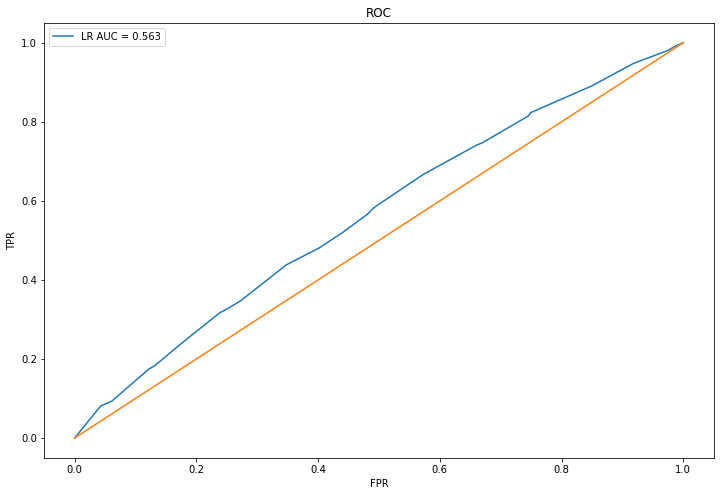

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "LR AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

# Final Tuning

## Uncontrollable Model

In [195]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
UC_Sampled = pd.read_csv('datasets/uncontrollable_sample.csv', index_col='id')

In [197]:
#Split into training and testing

from sklearn.model_selection import train_test_split

X = UC_Sampled.drop(columns=['Label'])
Y = UC_Sampled['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [198]:
# Set up Grid Search

# importing libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [199]:
# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

In [200]:
# Technically I don't need a pipeline but I'll just stick to it
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

# Creating lists of parameter for Decision Tree Classifier
criterion = ['entropy','gini']
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = np.arange(1,200,20)
    

# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(dec_tree__criterion=criterion,
                dec_tree__min_samples_leaf=min_samples_leaf_values,
                dec_tree__min_samples_split=min_samples_split_values)

In [201]:
    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
    clf_GS = GridSearchCV(pipe, parameters, scoring='roc_auc')

    # Fitting the grid search
    clf_GS.fit(X_train, Y_train)

    # Viewing The Best Parameters
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
    print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree']);

Best Criterion: gini
Best mi_samples_leaf: 181
Best mi_samples_split: 1052

DecisionTreeClassifier(min_samples_leaf=181, min_samples_split=1052)


In [202]:
print(); print('Best AUC = '+str(clf_GS.best_score_))


Best AUC = 0.5740736323554284


In [204]:
#### Build Decision Tree and Report AUC

#Build decision tree using the best parameters identified above
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=180, min_samples_split=1050)
fit = dt.fit(X_train, Y_train)

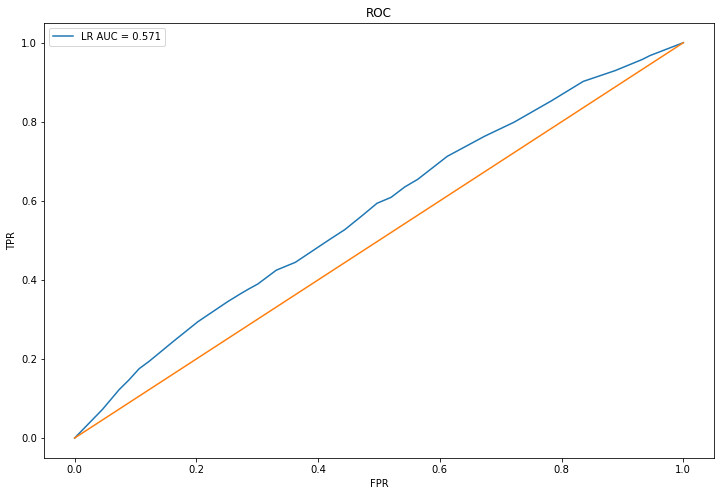

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

## Controllable Model

In [214]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [353]:
df_controllable_sampled = pd.read_csv('datasets/controllable_sampled.csv', index_col = 'id')

In [216]:
from sklearn.model_selection import train_test_split

X = df_controllable_sampled.drop(columns=['Label'])
Y = df_controllable_sampled['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [217]:
# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

In [218]:
# Technically I don't need a pipeline but I'll just stick to it
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

# Creating lists of parameter for Decision Tree Classifier
criterion = ['entropy','gini']
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = np.arange(1,200,20)
    

# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(dec_tree__criterion=criterion,
                dec_tree__min_samples_leaf=min_samples_leaf_values,
                dec_tree__min_samples_split=min_samples_split_values)

In [219]:
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters, scoring='roc_auc')

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree']);

Best Criterion: gini
Best mi_samples_leaf: 41
Best mi_samples_split: 352

DecisionTreeClassifier(min_samples_leaf=41, min_samples_split=352)


In [220]:
print(); print('Best AUC = '+str(clf_GS.best_score_))


Best AUC = 0.6584461226479437


In [221]:
#### Build Decision Tree and Report AUC

#import the decision tree module from sklearn
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=40, min_samples_split=350)
fit = dt.fit(X_train, Y_train)

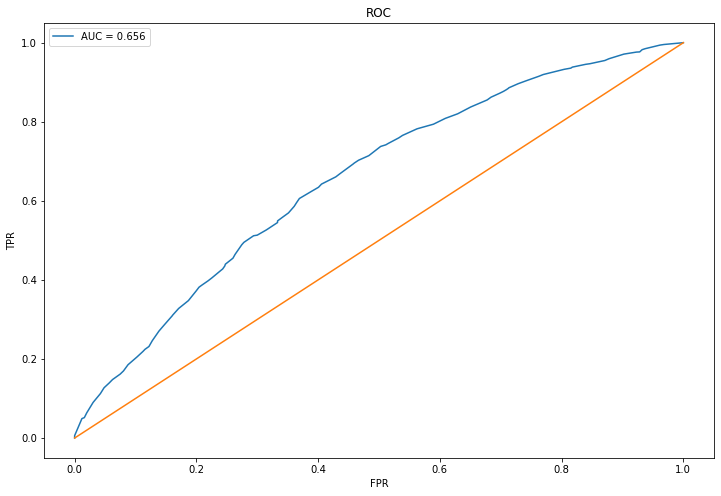

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

## Combined Model Tuning

In [232]:
df_controllable_all = pd.read_csv('Faizan_scratch/Controllables/controllable_cleaned_features.csv', index_col='id')

In [238]:
df_uncontrollable_all = pd.read_csv('Faizan_scratch/uncontrollable_cleaned_features.csv', index_col='id')

In [240]:
df_all_features = df_controllable_all.merge(df_uncontrollable_all, left_index=True, right_index=True)

In [243]:
df_all_features = df_all_features.drop(columns=['host_is_superhost', 'Label_y'])

In [244]:
df_all_features = df_all_features.rename(columns={'Label_x':'Label'})

In [245]:
from sklearn.model_selection import train_test_split

X = df_all_features.drop(columns=['Label'])
Y = df_all_features['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [246]:
# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

In [247]:
# Technically I don't need a pipeline but I'll just stick to it
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

# Creating lists of parameter for Decision Tree Classifier
criterion = ['entropy','gini']
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = np.arange(1,200,20)
    

# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(dec_tree__criterion=criterion,
                dec_tree__min_samples_leaf=min_samples_leaf_values,
                dec_tree__min_samples_split=min_samples_split_values)

In [248]:
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters, scoring='roc_auc')

# Fitting the grid search
clf_GS.fit(X_train, Y_train)

# Viewing The Best Parameters
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best mi_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('Best mi_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree']);

Best Criterion: gini
Best mi_samples_leaf: 141
Best mi_samples_split: 352

DecisionTreeClassifier(min_samples_leaf=141, min_samples_split=352)


In [249]:
print(); print('Best AUC = '+str(clf_GS.best_score_))


Best AUC = 0.6584931525115076


In [250]:
#### Build Decision Tree and Report AUC

#import the decision tree module from sklearn
dt = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=140, min_samples_split=350)
fit = dt.fit(X_train, Y_train)

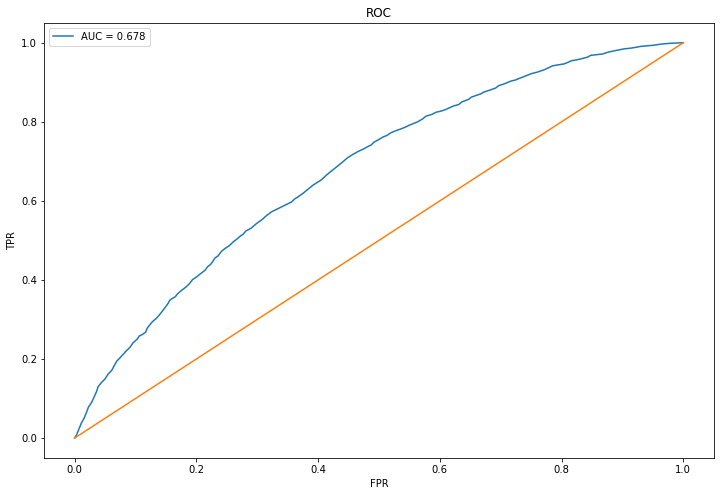

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

# ULTIMATE BAKEOFF

## Uncontrollable

In [365]:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm, linear_model


#Best models:

best_rf_uc = RandomForestClassifier(criterion='entropy', n_estimators=200, 
                                    max_features=11, oob_score=True,min_samples_leaf=61,min_samples_split=1402)
best_gb_uc = GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features='sqrt',
                           min_samples_leaf=0.24545454545454548,
                           min_samples_split=0.42727272727272736,
                           n_estimators=1000, subsample=0.9)
best_dt_uc = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=180, min_samples_split=1050)
best_svm_uc = svm.SVC(kernel = 'rbf', C = 0.2681812609453013)
best_lr_uc = linear_model.LogisticRegression(C = 10**-1.5, penalty = 'l1', max_iter = 4000, solver = 'saga')


models = {'RF': best_rf_uc, 'GB' : best_gb_uc, 'DT' : best_dt_uc, 'SVM': best_svm_uc, 'LR': best_lr_uc}


In [366]:
X = df_all_features[uncontrollable_columns]
Y = df_all_features['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [367]:
for model in models:
    models[model].fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [368]:
predictions_rf = best_rf_uc.predict_proba(X_test[uncontrollable_columns])[:,1]
predictions_gb = best_gb_uc.predict_proba(X_test[uncontrollable_columns])[:,1]
predictions_dt = best_dt_uc.predict_proba(X_test[uncontrollable_columns])[:,1]
predictions_svm = best_svm_uc.decision_function(X_test[uncontrollable_columns])
predictions_lr = best_lr_uc.predict_proba(X_test[uncontrollable_columns])[:,1]

predictions = {'RF': predictions_rf, 'GB' : predictions_gb, 'DT' : predictions_dt, 'SVM': predictions_svm, 'LR': predictions_lr}



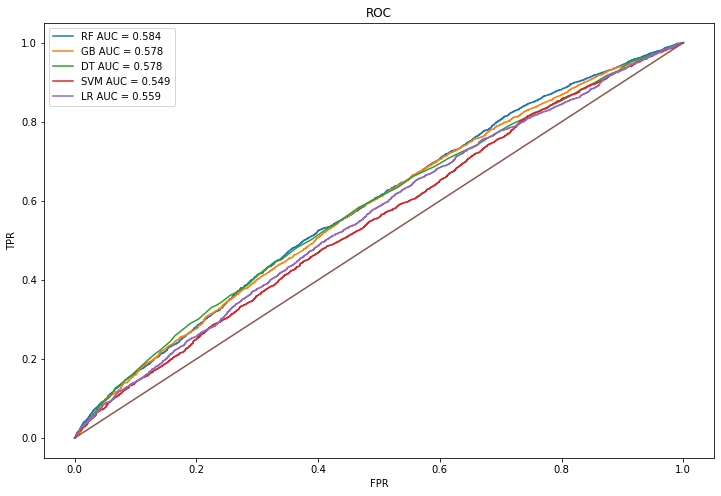

In [369]:
#Plot ROC curves of the two models

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics


plt.figure(figsize=(12,8))

for prediction in predictions:
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions[prediction])
    auc = metrics.auc(fpr,tpr)
    label = prediction + " AUC = %.3f"%auc
    plt.plot(fpr,tpr,label = label)
    

#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

## Controllable

In [370]:
best_rf_c = RandomForestClassifier(criterion='entropy', max_features=8,
                       min_samples_split=100, n_estimators=160)
best_gb_c = GradientBoostingClassifier(n_estimators=100, max_depth=5,max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=1000,
                                                  random_state=10,
                                                  subsample=0.8)
best_dt_c = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=40, min_samples_split=350)
best_svm_c = svm.SVC(kernel = 'rbf',  C = 0.24175940791691308)
best_lr_c = linear_model.LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 2000, C = 0.20151357338155584)

models = {'RF': best_rf_c, 'GB' : best_gb_c, 'DT' : best_dt_c, 'SVM': best_svm_c, 'LR': best_lr_c}

In [371]:
X = df_all_features[controllable_columns]
Y = df_all_features['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [372]:
for model in models:
    models[model].fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [374]:
predictions_rf = best_rf_c.predict_proba(X_test[controllable_columns])[:,1]
predictions_gb = best_gb_c.predict_proba(X_test[controllable_columns])[:,1]
predictions_dt = best_dt_c.predict_proba(X_test[controllable_columns])[:,1]
predictions_svm = best_svm_c.decision_function(X_test[controllable_columns])
predictions_lr = best_lr_c.predict_proba(X_test[controllable_columns])[:,1]

predictions = {'RF': predictions_rf, 'GB' : predictions_gb, 'DT' : predictions_dt, 'SVM': predictions_svm, 'LR': predictions_lr}


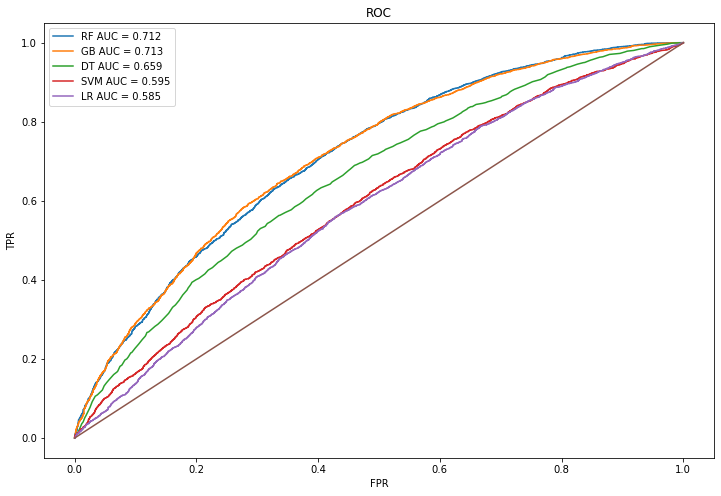

In [375]:
#Plot ROC curves of the two models

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics


plt.figure(figsize=(12,8))

for prediction in predictions:
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions[prediction])
    auc = metrics.auc(fpr,tpr)
    label = prediction + " AUC = %.3f"%auc
    plt.plot(fpr,tpr,label = label)
    

#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

## Winners: 

### Controllable: 

RandomForestClassifier(criterion='entropy', max_features=8,
                       min_samples_split=100, n_estimators=160)


### Uncontrollable:

RandomForestClassifier(criterion='entropy', n_estimators=200, 
                                    max_features=11, oob_score=True,min_samples_leaf=61,min_samples_split=1402)

## Leveraging Uncontrollable and Controllable models

Basic Idea: Each location gets 2 scores - a location score and a property/quality score. We can bucket the listings into 4 buckets based on score combos

In [252]:
#Take the full dataset and split into train and test:

from sklearn.model_selection import train_test_split

X = df_all_features.drop(columns=['Label'])
Y = df_all_features['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [262]:
#Train the location model and the property model on the Train dataset using best model parameters

uncontrollable_columns = UC_Sampled.drop(columns='Label').columns
dt_uncontrollable = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=180, min_samples_split=1050)
fit = dt_uncontrollable.fit(X_train[uncontrollable_columns], Y_train)

controllable_columns = df_controllable_sampled.drop(columns='Label').columns
dt_controllable = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=40, min_samples_split=350)
fit = dt_controllable.fit(X_train[controllable_columns], Y_train)


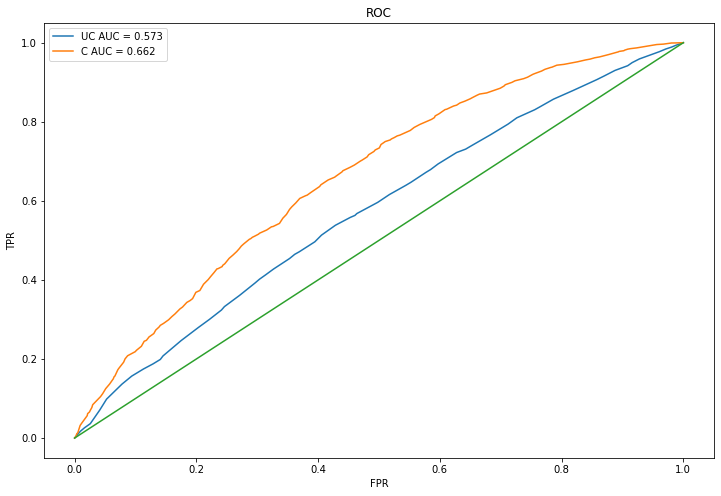

In [264]:
#Plot ROC curves of the two models

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

predictions_dt_uc = dt_uncontrollable.predict_proba(X_test[uncontrollable_columns])[:,1]
predictions_dt_c = dt_controllable.predict_proba(X_test[controllable_columns])[:,1]


plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt_uc)
auc = metrics.auc(fpr,tpr)
label = "UC AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt_c)
auc = metrics.auc(fpr,tpr)
label = "C AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

In [273]:
#lets create some predictions:

df_test_with_predictions = pd.DataFrame(Y_test)

In [274]:
df_test_with_predictions['Location_predictions'] = dt_uncontrollable.predict(X_test[uncontrollable_columns])

In [275]:
df_test_with_predictions['Property_predictions'] = dt_controllable.predict(X_test[controllable_columns])

In [320]:
high_loc_high_prop = df_test_with_predictions[(df_test_with_predictions['Location_predictions']==1) & (df_test_with_predictions['Property_predictions']==1)]
high_loc_low_prop = df_test_with_predictions[(df_test_with_predictions['Location_predictions']==1) & (df_test_with_predictions['Property_predictions']==0)]
low_loc_high_prop = df_test_with_predictions[(df_test_with_predictions['Location_predictions']==0) & (df_test_with_predictions['Property_predictions']==1)]
low_loc_low_prop = df_test_with_predictions[(df_test_with_predictions['Location_predictions']==0) & (df_test_with_predictions['Property_predictions']==0)]



In [321]:
print(len(high_loc_high_prop)/len(df_test_with_predictions))
print(len(low_loc_high_prop)/len(df_test_with_predictions))
print(len(high_loc_low_prop)/len(df_test_with_predictions))
print(len(low_loc_low_prop)/len(df_test_with_predictions))

0.21843989448561738
0.24846124858686094
0.1929405853535988
0.34015827157392287


In [322]:
high_loc_high_prop.Label.sum() / len(high_loc_high_prop)

0.6377228292121909

In [323]:
high_loc_low_prop.Label.sum() / len(high_loc_low_prop)

0.4420572916666667

In [324]:
low_loc_high_prop.Label.sum() / len(low_loc_high_pop)

0.576845298281092

In [325]:
low_loc_low_prop.Label.sum() / len(low_loc_low_pop)

0.33936484490398816

## We end up with the following table

<table style="height: 222px;" width="472">
<tbody>
<tr>
<td style="width: 150px;">&nbsp;</td>
<td style="width: 150px; text-align: center;"><strong>High Property Score</strong></td>
<td style="width: 150px; text-align: center;"><strong>Low Property Score</strong></td>
</tr>
<tr>
<td style="width: 150px; text-align: center;"><strong>High Location Score</strong></td>
<td style="width: 150px;">
<p>Percent of Listings: 21.8%</p>
<p>% Actual Positives: 63.8%</p>
</td>
<td style="width: 150px;">
<p>Percent of Listings: 19.3%</p>
<p>% Actual Positives: 44.2%</p>
</td>
</tr>
<tr>
<td style="width: 150px; text-align: center;"><strong>Low Location Score</strong></td>
<td style="width: 150px;">
<p>Percent of Listings: 24.8%</p>
<p>% Actual Positives: 57.7%</p>
</td>
<td style="width: 150px;">
<p>Percent of Listings: 34.0%</p>
<p>% Actual Positives: 33.9%</p>
</td>
</tr>
</tbody>
</table>


## What if we use rankings to create 9 (or more) buckets instead of 4?

In [290]:
df_test_with_predictions['Location_predictions_score'] = dt_uncontrollable.predict_proba(X_test[uncontrollable_columns])[:,1]
df_test_with_predictions['Property_predictions_score'] = dt_controllable.predict_proba(X_test[controllable_columns])[:,1]


In [294]:
##We'll use percentiles to group into top 30%, middle 40%, bottom 30% for each:
loc_high = df_test_with_predictions['Location_predictions_score'].quantile(0.7)
loc_low = df_test_with_predictions['Location_predictions_score'].quantile(0.3)
prop_high = df_test_with_predictions['Property_predictions_score'].quantile(0.7)
prop_low = df_test_with_predictions['Property_predictions_score'].quantile(0.3)

In [298]:
df_test_with_predictions['Loc_bucket'] = pd.qcut(df_test_with_predictions['Location_predictions_score'], 3, labels=["low", "medium", "high"])

df_test_with_predictions['Prop_bucket'] = pd.qcut(df_test_with_predictions['Property_predictions_score'], 3, labels=["low", "medium", "high"])


In [316]:
statistics = df_test_with_predictions.groupby(['Loc_bucket', 'Prop_bucket']).agg(['mean', 'count'])['Label']

In [317]:
statistics['percent'] = statistics['count'] / len(df_test_with_predictions)

In [318]:
statistics

mean  count   percent
Loc_bucket Prop_bucket                           
low        low          0.255057   1137  0.142821
           medium       0.454148    916  0.115061
           high         0.604592    784  0.098480
medium     low          0.348864    880  0.110539
           medium       0.502278    878  0.110288
           high         0.615741    864  0.108529
high       low          0.376833    682  0.085668
           medium       0.573944    852  0.107022
           high         0.663223    968  0.121593

<table style="height: 306px;" width="637">
<tbody>
<tr>
<td style="width: 152px;">&nbsp;</td>
<td style="width: 152px; text-align: center;"><strong>High Property Score</strong></td>
<td style="width: 152px; text-align: center;"><strong>Medium Property Score</strong></td>
<td style="width: 153px; text-align: center;"><strong>Low Property Score</strong></td>
</tr>
<tr>
<td style="width: 152px; text-align: center;"><strong>High Location Score</strong></td>
<td style="width: 152px;">
<p>Percent of Listings: 12.1%</p>
<p>% Actual Positives: 66.3%</p>
</td>
<td style="width: 152px;">
<p>Percent of Listings: 10.7%</p>
<p>% Actual Positives: 57.4%</p>
</td>
<td style="width: 153px;">
<p>Percent of Listings: 8.6%</p>
<p>% Actual Positives: 37.7%</p>
</td>
</tr>
<tr>
<td style="width: 152px; text-align: center;"><strong>Medium Location Score</strong></td>
<td style="width: 152px;">Percent of Listings: 10.9%
<p>% Actual Positives: 61.6%</p>
</td>
<td style="width: 152px;">Percent of Listings: 11.0%
<p>% Actual Positives: 50.2%</p>
</td>
<td style="width: 153px;">Percent of Listings: 11.1%
<p>% Actual Positives: 34.9%</p>
</td>
</tr>
<tr>
<td style="width: 152px; text-align: center;"><strong>Low Location Score</strong></td>
<td style="width: 152px;">
<p>Percent of Listings: 9.8%</p>
<p>% Actual Positives: 60.5%</p>
</td>
<td style="width: 152px;">
<p>Percent of Listings: 11.5%</p>
<p>% Actual Positives: 45.4%</p>
</td>
<td style="width: 153px;">
<p>Percent of Listings: 14.3%</p>
<p>% Actual Positives: 25.5%</p>
</td>
</tr>
</tbody>
</table>

In [326]:
statistics

mean  count   percent
Loc_bucket Prop_bucket                           
low        low          0.255057   1137  0.142821
           medium       0.454148    916  0.115061
           high         0.604592    784  0.098480
medium     low          0.348864    880  0.110539
           medium       0.502278    878  0.110288
           high         0.615741    864  0.108529
high       low          0.376833    682  0.085668
           medium       0.573944    852  0.107022
           high         0.663223    968  0.121593

In [331]:
df_listings_original = pd.read_csv('Faizan_scratch/listings_features_with_label.csv', index_col='id')

In [333]:
df_listings_original.columns.values

array(['Unnamed: 0', 'last_scraped', 'name', 'host_id', 'host_name',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nigh

In [343]:
merged_with_reviews = df_test_with_predictions.merge(df_listings_original, left_index=True, right_index=True)



In [344]:
merged_with_reviews = merged_with_reviews[['Label_x', 'Location_predictions', 'Property_predictions', 'Location_predictions_score', 'Property_predictions_score','review_scores_rating','reviews_per_month','number_of_reviews','number_of_reviews_ltm']]



In [347]:
merged_with_reviews.corr()

,Label_x,Location_predictions,Property_predictions,Location_predictions_score,Property_predictions_score,review_scores_rating,reviews_per_month,number_of_reviews,number_of_reviews_ltm
Label_x,1.000000,0.104721,0.228420,0.127719,0.287945,0.695126,-0.035508,-0.054596,-0.037230
Location_predictions,0.104721,1.000000,0.107396,0.786384,0.130173,0.126263,-0.118550,-0.020815,-0.075342
Property_predictions,0.228420,0.107396,1.000000,0.123159,0.812507,0.256741,-0.101879,-0.003526,-0.044873
Location_predictions_score,0.127719,0.786384,0.123159,1.000000,0.150340,0.152454,-0.121303,-0.017112,-0.076694
Property_predictions_score,0.287945,0.130173,0.812507,0.150340,1.000000,0.352020,-0.122784,-0.021450,-0.065987
review_scores_rating,0.695126,0.126263,0.256741,0.152454,0.352020,1.000000,0.005339,0.032706,0.027361
reviews_per_month,-0.035508,-0.118550,-0.101879,-0.121303,-0.122784,0.005339,1.000000,0.426734,0.734876
number_of_reviews,-0.054596,-0.020815,-0.003526,-0.017112,-0.021450,0.032706,0.426734,1.000000,0.681427
number_of_reviews_ltm,-0.037230,-0.075342,-0.044873,-0.076694,-0.065987,0.027361,0.734876,0.681427,1.000000


In [376]:
#Take the full dataset and split into train and test:

from sklearn.model_selection import train_test_split

X = df_all_features.drop(columns=['Label'])
Y = df_all_features['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [378]:
#Train the location model and the property model on the Train dataset using best model parameters


uncontrollable_columns = UC_Sampled.drop(columns='Label').columns
rf_uncontrollable = RandomForestClassifier(criterion='entropy', n_estimators=200, 
                                    max_features=11, oob_score=True,min_samples_leaf=61,min_samples_split=1402)
fit = rf_uncontrollable.fit(X_train[uncontrollable_columns], Y_train)

controllable_columns = df_controllable_sampled.drop(columns='Label').columns
rf_controllable = RandomForestClassifier(criterion='entropy', max_features=8,
                       min_samples_split=100, n_estimators=160)
fit = rf_controllable.fit(X_train[controllable_columns], Y_train)

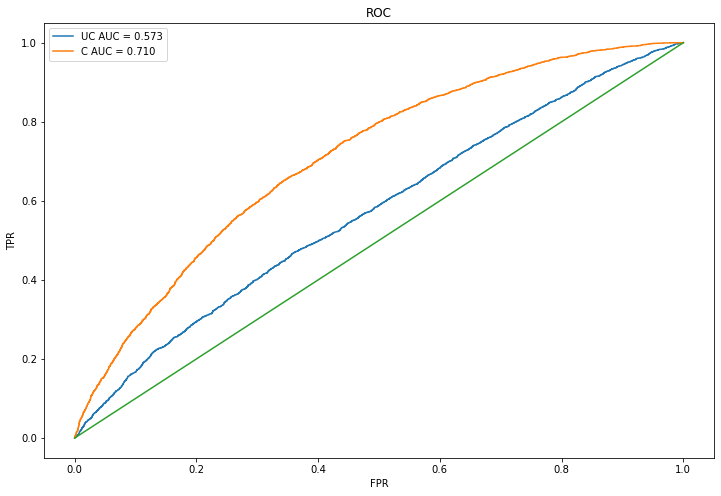

In [379]:
#Plot ROC curves of the two models

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

predictions_rf_uc = rf_uncontrollable.predict_proba(X_test[uncontrollable_columns])[:,1]
predictions_rf_c = rf_controllable.predict_proba(X_test[controllable_columns])[:,1]


plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_rf_uc)
auc = metrics.auc(fpr,tpr)
label = "UC AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_rf_c)
auc = metrics.auc(fpr,tpr)
label = "C AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

In [380]:
df_test_with_predictions = pd.DataFrame(Y_test)

In [381]:
df_test_with_predictions['Location_predictions_score'] = rf_uncontrollable.predict_proba(X_test[uncontrollable_columns])[:,1]
df_test_with_predictions['Property_predictions_score'] = rf_controllable.predict_proba(X_test[controllable_columns])[:,1]


In [382]:
df_test_with_predictions['Loc_bucket'] = pd.qcut(df_test_with_predictions['Location_predictions_score'], 3, labels=["low", "medium", "high"])

df_test_with_predictions['Prop_bucket'] = pd.qcut(df_test_with_predictions['Property_predictions_score'], 3, labels=["low", "medium", "high"])


In [383]:
statistics = df_test_with_predictions.groupby(['Loc_bucket', 'Prop_bucket']).agg(['mean', 'count'])['Label']

In [384]:
statistics['percent'] = statistics['count'] / len(df_test_with_predictions)

In [385]:
statistics

mean  count   percent
Loc_bucket Prop_bucket                           
low        low          0.232350   1119  0.140560
           medium       0.475787    826  0.103756
           high         0.644570    709  0.089059
medium     low          0.249431    878  0.110288
           medium       0.497256    911  0.114433
           high         0.659722    864  0.108529
high       low          0.336377    657  0.082527
           medium       0.534934    916  0.115061
           high         0.708603   1081  0.135787

<table style="height: 306px;" width="637">
<tbody>
<tr>
<td style="width: 152px;">&nbsp;</td>
<td style="width: 152px; text-align: center;"><strong>High Property Score</strong></td>
<td style="width: 152px; text-align: center;"><strong>Medium Property Score</strong></td>
<td style="width: 153px; text-align: center;"><strong>Low Property Score</strong></td>
</tr>
<tr>
<td style="width: 152px; text-align: center;"><strong>High Location Score</strong></td>
<td style="width: 152px;">
<p>Percent of Listings: 12.1%</p>
<p>% Actual Positives: 66.3%</p>
</td>
<td style="width: 152px;">
<p>Percent of Listings: 10.7%</p>
<p>% Actual Positives: 57.4%</p>
</td>
<td style="width: 153px;">
<p>Percent of Listings: 8.6%</p>
<p>% Actual Positives: 37.7%</p>
</td>
</tr>
<tr>
<td style="width: 152px; text-align: center;"><strong>Medium Location Score</strong></td>
<td style="width: 152px;">Percent of Listings: 10.9%
<p>% Actual Positives: 61.6%</p>
</td>
<td style="width: 152px;">Percent of Listings: 11.0%
<p>% Actual Positives: 50.2%</p>
</td>
<td style="width: 153px;">Percent of Listings: 11.1%
<p>% Actual Positives: 34.9%</p>
</td>
</tr>
<tr>
<td style="width: 152px; text-align: center;"><strong>Low Location Score</strong></td>
<td style="width: 152px;">
<p>Percent of Listings: 9.8%</p>
<p>% Actual Positives: 60.5%</p>
</td>
<td style="width: 152px;">
<p>Percent of Listings: 11.5%</p>
<p>% Actual Positives: 45.4%</p>
</td>
<td style="width: 153px;">
<p>Percent of Listings: 14.3%</p>
<p>% Actual Positives: 25.5%</p>
</td>
</tr>
</tbody>
</table>